In [1]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

# Análise Preditiva Avançada


## Trabalho Individual
- **Curso:** FGV MBA - Business Analytics e Big Data
- **Disciplina:** Análise Preditiva Avançada
- **Professor:** Hitoshi Nagano e Gustavo Mirapalheta
- **Tarefa:** Trabalho Subistitutivo de Prova
- **Kaggle:** Este notebook pode ser acessado no [Kaggle](https://www.kaggle.com/rodrigonca/an-lise-preditiva-avan-ada-trabalho-individual)

|Github|Kaggle|Nome|Matricula|E-mail|
|---|---|---|---|---|
|<a href="https://github.com/RodriGonca"><img src="https://avatars2.githubusercontent.com/u/50252438?s=460&v=4" title="RodriGonca" width="40" height="40"></a>|<a href="https://www.kaggle.com/rodrigonca"><img src="https://storage.googleapis.com/kaggle-avatars/images/3511253-kg.png" title="RodriGonca" width="40" height="40"></a>|Rodrigo Goncalves|A57566093|[rodrigo.goncalves@me.com](rodrigo.goncalves@me.com)|

# Enunciado

- **Instruções** <br>
Turma: MSP 11924-TBABD-T1
Disciplina: Análise Preditiva Avançada (Professores Mirapalheta e Hitoshi)</br>

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal?</br>

- **Questão 2:** <br>
Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests. Tentem trabalhar a hiperparametrização para aumento do desempenho. Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</br>

- **Anti-plágio** <br>
Anti-plágio ativado</br>

- **Data Final** <br>
8 de junho de 2020 23:59</br>

# Desenvolvimento

Começamos por instalar o pacote com os datasets padrões do tensorflow e importando as libraries necessárias.

In [2]:
!pip install tensorflow-datasets

     |████████████████████████████████| 3.3 MB 2.8 MB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [3]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Para permitir a reprodutibilidade dos resultados inicializamos os seeds dos módulos randômicos do Python, Numpy e Tensorflow.

> *I remember once going to see him when he was ill at Putney. I had ridden in taxi cab number 1729 and remarked that the number seemed to me rather a dull one, and that I hoped it was not an unfavourable omen. "No," he replied, "it is a very interesting number; it is the smallest number expressible as the sum of two cubes in two different ways.*

[G. H. Hardy](https://en.wikipedia.org/wiki/G._H._Hardy) quoting [Srinivasa Ramanujan](https://en.wikipedia.org/wiki/Srinivasa_Ramanujan)

In [4]:
seed = 1729
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# Questão 1

- **Questão 1:** <br>
<span style="color:red"><strong>Tomando por base o conjunto de dados MNIST, padrão do pacote Keras</strong></span>, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

O código abaixo faz o download e carrega os tensores de treino e teste do dataset mnist.

In [5]:
x_train, y_train = tfds.as_numpy(
    tfds.load('mnist', 
              batch_size = -1,
              split = 'train',
              as_supervised = True))

x_test, y_test = tfds.as_numpy(
    tfds.load('mnist', 
              batch_size = -1,
              split = 'test',
              as_supervised = True))



Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


Visualizando algumas imagens do dataset de treino.

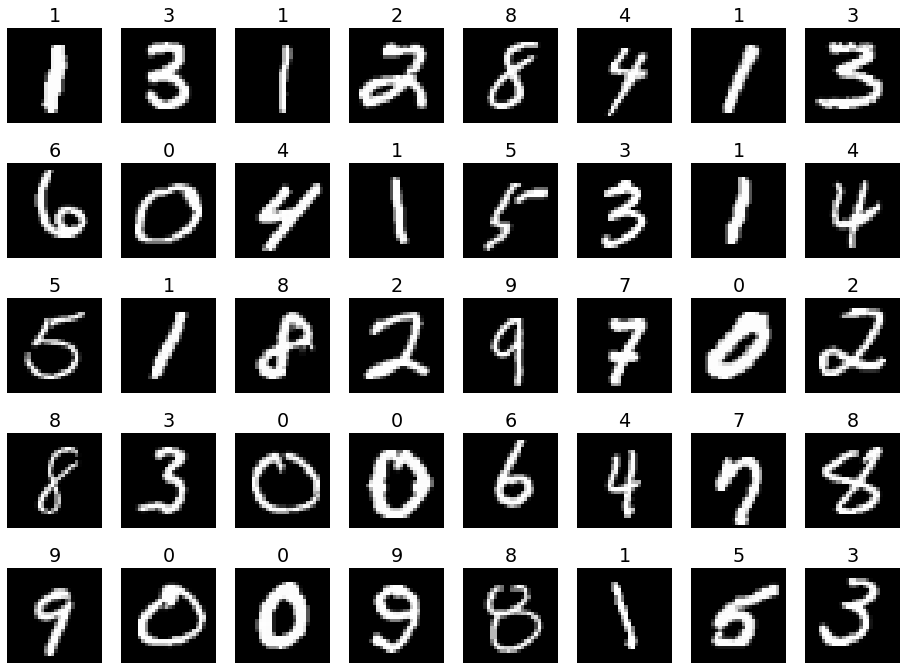

In [6]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows    = 5

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(x_train))
    img = np.reshape(x_train[rnd], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title(y_train[rnd])
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

Para o treinamento destas redes neurais é necessário fazer:
- a transformação do shape dos tensores de labels de `(60000,)` para `(60000, 1)`
- a transformação dos lables para dummies utilizando a função `to_categorical()`
- e também é aconselhável a normalização dos dados entre `0` e `1`.

In [7]:
y_train = np.expand_dims(y_train, axis = 1)
y_test  = np.expand_dims(y_test, axis = 1)

y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

x_train = x_train / 255
x_test  = x_test / 255

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, <span style="color:red"><strong>defina e elabore uma rede neural sequencial</strong></span>, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

Vamos iniciar com uma rede neural de apenas `1` ***hiden layer*** com `512` neurônios, função de ativação ***relu***, seguida de um ***dropout*** de `30%` para regularização da rede e com um ***output layer*** com `10` neurônios, com a função de ativação ***softmax***, representando a probabilidade de cada um dos 10 dígitos possíveis `[0, 1, 2, 3, 4, 5, 6, 7, ,8, 9]`

In [8]:
i = Input(x_train.shape[1:])

a = Flatten()(i)

a = Dense(512, activation = 'relu')(a)
a = Dropout(0.3)(a)

a = Dense(10, activation = 'softmax')(a)

model_NNS = Model(i ,a)

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, <span style="color:red"><strong>apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede.</strong></span> Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

O input do tensor é de `(28, 28, 1)` que são transformados em um vetor de `(784)` neurônios, seguidos de um vetor de `(512)` e finalmente um vetor de `(10)`

In [9]:
model_NNS.compile(optimizer = 'rmsprop',
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

model_NNS.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. <span style="color:red"><strong>Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste.</strong></span> Qual o número de camadas que você consideraria ideal? </br>

Adicionamos em uma segunda rede com mais `3` ***hiden layers***, com `(256)` neurônios, seguido de `(128)` neurônios, seguido de `(64)` neurônios e finalmente `(10)` neurônios.

In [10]:
i = Input(x_train.shape[1:])

b = Flatten()(i)

b = Dense(512, activation = 'relu')(b)
b = Dropout(0.3)(b)

b = Dense(256, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(128, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(64, activation = 'relu')(b)
b = Dropout(0.2)(b)

b = Dense(10, activation = 'softmax')(b)

model_NNC = Model(i ,b)

In [11]:
model_NNC.compile(optimizer = 'rmsprop',
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

model_NNC.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3289

Também criamos uma rede convolucional para verificar se existe melhora na acurácia de classificação das imagens.

In [12]:
i = Input(x_train.shape[1:])

c = Conv2D(32, (3,3), activation ='relu', padding = 'same')(i)
c = BatchNormalization()(c)
c = Conv2D(32, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(64, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(64, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(128, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(128, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Conv2D(256, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = Conv2D(256, (3,3), activation ='relu', padding = 'same')(c)
c = BatchNormalization()(c)
c = MaxPooling2D(2,2)(c)

c = Flatten()(c)

c = Dense(512, activation = 'relu')(c)
c = Dropout(0.3)(c)

c = Dense(256, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(128, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(64, activation = 'relu')(c)
c = Dropout(0.2)(c)

c = Dense(10, activation = 'softmax')(c)

model_CNN = Model(i, c)

In [13]:
model_CNN.compile(optimizer = 'rmsprop',
                  loss = "categorical_crossentropy",
                  metrics = ["accuracy"])

model_CNN.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1849

In [14]:
batch_size = 2048

train_gen = ImageDataGenerator(rotation_range = 10,
                               horizontal_flip = False,
                               vertical_flip = False,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               rescale = 1.,
                               zoom_range = 0.2,
                               fill_mode = 'nearest',
                               cval = 0)

train_generator_NNS = train_gen.flow(x_train, y_train, batch_size)
# utilizado para o treinamento da rede sem a normalização dos dados
train_generator_NNS_N = train_gen.flow(x_train * 255, y_train, batch_size)
# ----------------------------------------------------------------
train_generator_NNC = train_gen.flow(x_train, y_train, batch_size)
train_generator_CNN = train_gen.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size

checkpoint_NNS = ModelCheckpoint('model_NNS.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 0, 
                                 save_best_only = True, 
                                 mode = 'auto')

# checkpoint utilizado para o treinamento da rede sem a normalização dos dados
checkpoint_NNS_N = ModelCheckpoint('model_NNS_N.h5', 
                                   monitor = 'val_loss', 
                                   verbose = 0, 
                                   save_best_only = True, 
                                   mode = 'auto')

checkpoint_NNC = ModelCheckpoint('model_NNC.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 0, 
                                 save_best_only = True, 
                                 mode = 'auto')

checkpoint_CNN = ModelCheckpoint('model_CNN.h5', 
                                 monitor = 'val_loss', 
                                 verbose = 0, 
                                 save_best_only = True, 
                                 mode = 'auto')

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados. <span style="color:red"><strong>após 50 épocas de treino.</strong></span> Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [15]:
epochs = 50

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. <span style="color:red"><strong>Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre.</strong></span> Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

In [16]:
%%time
history_NNS = model_NNS.fit(train_generator_NNS, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_NNS])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
29/29 [==============================] - 17s 598ms/step - loss: 1.3844 - accuracy: 0.5593 - val_loss: 0.6048 - val_accuracy: 0.8682
Epoch 2/50
29/29 [==============================] - 17s 591ms/step - loss: 0.8938 - accuracy: 0.7367 - val_loss: 0.4392 - val_accuracy: 0.8964
Epoch 3/50
29/29 [==============================] - 18s 611ms/step - loss: 0.6783 - accuracy: 0.8052 - val_loss: 0.3472 - val_accuracy: 0.9022
Epoch 4/50
29/29 [==============================] - 17s 576ms/step - loss: 0.5411 - accuracy: 0.8485 - val_loss: 0.2497 - val_accuracy: 0.9422
Epoch 5/50
29/29 [==============================] - 17s 589ms/step - loss: 0.4494 - accuracy: 0.8723 - val_loss: 0.2086 - val_accuracy: 0.9484
Epoch 6/50
29/29 [==============================] - 18s 608ms/step - loss: 0.3955 - accuracy: 0.8863 - val_loss: 0.1753 - val_accuracy: 0.9556
Epoch 7/50
29/29 [==============================] - 16s 559ms/step - loss: 0.3520 - accuracy: 0.

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. <span style="color:red"><strong>Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.</strong></span> após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. Qual o número de camadas que você consideraria ideal? </br>

Conforme solicitado pelo enunciado vamos treinar uma rede adicional sem a normalização dos dados para avaliar o efeito.

In [17]:
%%time
history_NNS_N = model_NNS.fit(train_generator_NNS_N, 
                              validation_data = (x_test * 255, y_test), 
                              steps_per_epoch = steps_per_epoch, 
                              epochs = epochs,
                              callbacks = [checkpoint_NNS_N])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
29/29 [==============================] - 15s 513ms/step - loss: 14.8896 - accuracy: 0.9621 - val_loss: 3.1404 - val_accuracy: 0.9869
Epoch 2/50
29/29 [==============================] - 16s 540ms/step - loss: 10.7071 - accuracy: 0.9623 - val_loss: 2.8903 - val_accuracy: 0.9866
Epoch 3/50
29/29 [==============================] - 15s 534ms/step - loss: 8.8126 - accuracy: 0.9601 - val_loss: 2.0280 - val_accuracy: 0.9874
Epoch 4/50
29/29 [==============================] - 17s 574ms/step - loss: 7.5985 - accuracy: 0.9577 - val_loss: 1.8619 - val_accuracy: 0.9859
Epoch 5/50
29/29 [==============================] - 16s 542ms/step - loss: 6.5595 - accuracy: 0.9530 - val_loss: 1.7822 - val_accuracy: 0.9832
Epoch 6/50
29/29 [==============================] - 16s 545ms/step - loss: 5.9055 - accuracy: 0.9495 - val_loss: 1.4424 - val_accuracy: 0.9818
Epoch 7/50
29/29 [==============================] - 16s 554ms/step - loss: 5.2775 - accuracy: 

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.após 50 épocas de treino. <span style="color:red"><strong>Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste.</strong></span> Qual o número de camadas que você consideraria ideal? </br>

In [18]:
%%time
history_NNC = model_NNC.fit(train_generator_NNC, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_NNC])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
29/29 [==============================] - 16s 566ms/step - loss: 1.6925 - accuracy: 0.4128 - val_loss: 0.7921 - val_accuracy: 0.8042
Epoch 2/50
29/29 [==============================] - 16s 543ms/step - loss: 1.0557 - accuracy: 0.6542 - val_loss: 0.3375 - val_accuracy: 0.9086
Epoch 3/50
29/29 [==============================] - 16s 568ms/step - loss: 0.7402 - accuracy: 0.7649 - val_loss: 0.2619 - val_accuracy: 0.9254
Epoch 4/50
29/29 [==============================] - 16s 550ms/step - loss: 0.5805 - accuracy: 0.8174 - val_loss: 0.2543 - val_accuracy: 0.9148
Epoch 5/50
29/29 [==============================] - 16s 539ms/step - loss: 0.4747 - accuracy: 0.8544 - val_loss: 0.1621 - val_accuracy: 0.9508
Epoch 6/50
29/29 [==============================] - 16s 556ms/step - loss: 0.4106 - accuracy: 0.8770 - val_loss: 0.1311 - val_accuracy: 0.9591
Epoch 7/50
29/29 [==============================] - 16s 558ms/step - loss: 0.3557 - accuracy: 0.

In [19]:
%%time
history_CNN = model_CNN.fit(train_generator_CNN, 
                            validation_data = (x_test, y_test), 
                            steps_per_epoch = steps_per_epoch, 
                            epochs = epochs,
                            callbacks = [checkpoint_CNN])

Train for 29 steps, validate on 10000 samples
Epoch 1/50
29/29 [==============================] - 24s 832ms/step - loss: 1.2566 - accuracy: 0.5748 - val_loss: 2.3598 - val_accuracy: 0.1135
Epoch 2/50
29/29 [==============================] - 17s 600ms/step - loss: 0.2245 - accuracy: 0.9431 - val_loss: 4.7410 - val_accuracy: 0.1135
Epoch 3/50
29/29 [==============================] - 18s 606ms/step - loss: 0.1603 - accuracy: 0.9620 - val_loss: 9.0386 - val_accuracy: 0.1135
Epoch 4/50
29/29 [==============================] - 18s 627ms/step - loss: 0.1089 - accuracy: 0.9751 - val_loss: 10.0413 - val_accuracy: 0.1135
Epoch 5/50
29/29 [==============================] - 18s 615ms/step - loss: 0.0855 - accuracy: 0.9803 - val_loss: 14.6570 - val_accuracy: 0.1135
Epoch 6/50
29/29 [==============================] - 18s 610ms/step - loss: 0.0715 - accuracy: 0.9830 - val_loss: 16.9509 - val_accuracy: 0.1135
Epoch 7/50
29/29 [==============================] - 18s 617ms/step - loss: 0.0632 - accuracy:

In [20]:
model_NNS   = tf.keras.models.load_model('model_NNS.h5')
model_NNS_N = tf.keras.models.load_model('model_NNS_N.h5')
model_NNC   = tf.keras.models.load_model('model_NNC.h5')
model_CNN   = tf.keras.models.load_model('model_CNN.h5')

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. <span style="color:red"><strong>Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados.</strong></span> após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. <span style="color:red"><strong>Qual o número de camadas que você consideraria ideal?</strong></span> </br>

Dos `4` modelos desenvolvidos verificamos que que o modelo convolucional é o que apresenta maior acurácia e maior velocidade de convergência dos parâmetros.

Adicionalmente verificamos que o modelo de rede neural simples treinado sem a normalização dos dados apresenta uma curva de aprendizado mais lenta que o modelo simples com a normalização, como neste dataset os valores se encontram entre `0` e `255` a questão da normalização não é significante, porém em datasets onde o intervalo entre os valores é grande a não normalização pode causar problemas para a convergência dos parâmetros.

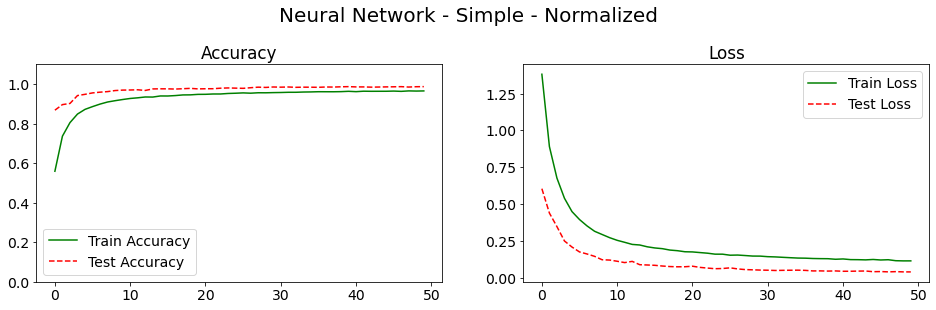

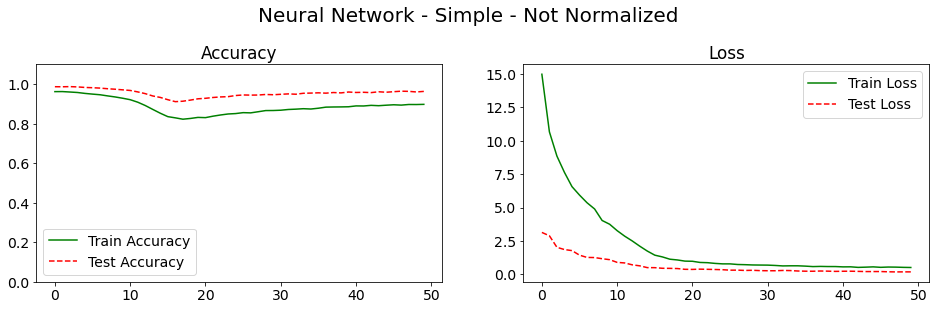

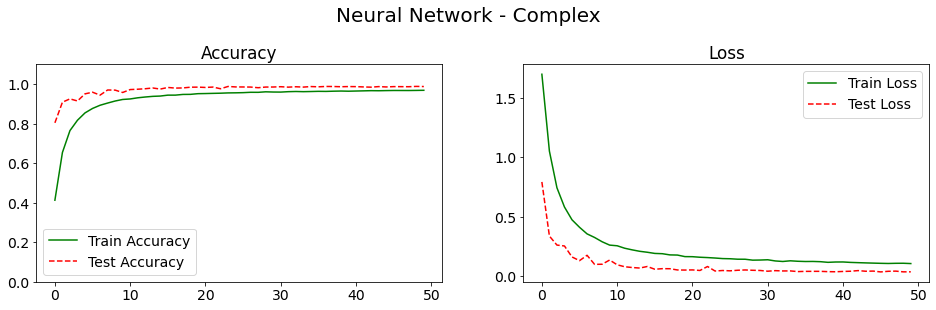

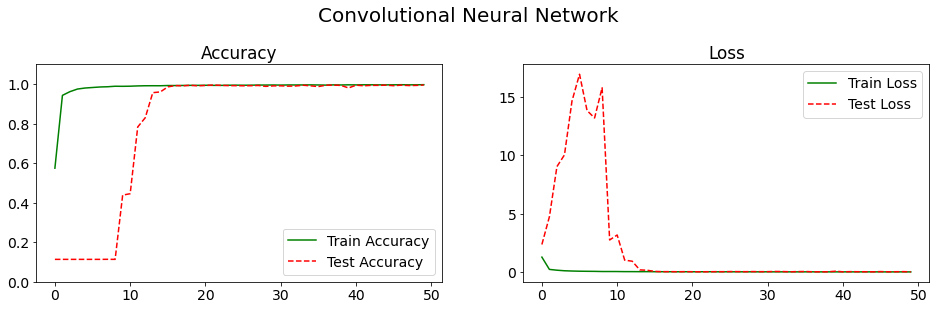

In [21]:
def plot_accuracy_hist(model_history, fig_tittle):

    plt.rcParams.update({'font.size': 14})

    fig = plt.figure(figsize = (16, 4))
    columns = 2
    rows = 1

    fig.suptitle(fig_tittle, fontsize = 20, y = 1.08)
    fig.add_subplot(rows, columns, 1)

    plt.title('Accuracy')
    plt.ylim(0, 1.1)
    
    plt.plot(model_history.history['accuracy'], 
             color='green', 
             label = 'Train Accuracy')

    plt.plot(model_history.history['val_accuracy'], 
             color='red', 
             label = 'Test Accuracy', 
             linestyle='dashed')

    plt.legend()

    fig.add_subplot(rows, columns, 2)

    plt.title('Loss')
    plt.plot(model_history.history['loss'], 
             color='green', 
             label = 'Train Loss')

    plt.plot(model_history.history['val_loss'], 
             color='red', 
             label = 'Test Loss', 
             linestyle='dashed')

    plt.legend()

    plt.show()

plot_accuracy_hist(history_NNS, 'Neural Network - Simple - Normalized')
plot_accuracy_hist(history_NNS_N, 'Neural Network - Simple - Not Normalized')
plot_accuracy_hist(history_NNC, 'Neural Network - Complex')
plot_accuracy_hist(history_CNN, 'Convolutional Neural Network')

In [22]:
def pred(model, x_test):
    pred_prob = model.predict(x_test)
    pred = np.argmax(pred_prob, axis = 1)
    return pred

print('Classification Report - Neural Network - Simple - Normalized')
print('------------------------------------------------------------')
print(classification_report(np.argmax(y_test, axis = 1), 
                            pred(model_NNS, x_test)))
print("Accuracy: %.4f" % accuracy_score(np.argmax(y_test, axis = 1), 
                                        pred(model_NNS, x_test)))
print('------------------------------------------------------------\n')

print('------------------------------------------------------------')
print('Classification Report - Neural Network - Simple - Not Normalized')
print(classification_report(np.argmax(y_test, axis = 1), 
                            pred(model_NNS_N, x_test * 255)))
print("Accuracy: %.4f" % accuracy_score(np.argmax(y_test, axis = 1), 
                                        pred(model_NNS_N, x_test * 255)))
print('------------------------------------------------------------\n')

print('------------------------------------------------------------')
print('Classification Report - Neural Network - Complex')
print(classification_report(np.argmax(y_test, axis = 1), 
                            pred(model_NNC, x_test)))
print("Accuracy: %.4f" % accuracy_score(np.argmax(y_test, axis = 1), 
                                        pred(model_NNC, x_test)))
print('------------------------------------------------------------\n')

print('------------------------------------------------------------')
print('\nClassification Report - Convolutional Neural Network')
print(classification_report(np.argmax(y_test, axis = 1), 
                            pred(model_CNN, x_test)))
print("Accuracy: %.4f" % accuracy_score(np.argmax(y_test, axis = 1), 
                                        pred(model_CNN, x_test)))
print('------------------------------------------------------------\n')

Classification Report - Neural Network - Simple - Normalized
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Accuracy: 0.9873
------------------------------------------------------------

----------------------------------------

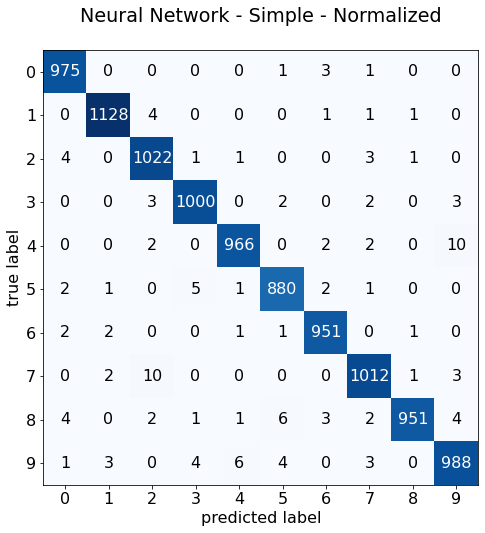

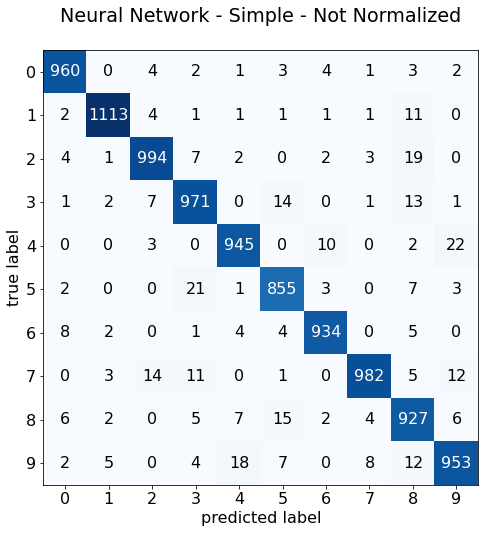

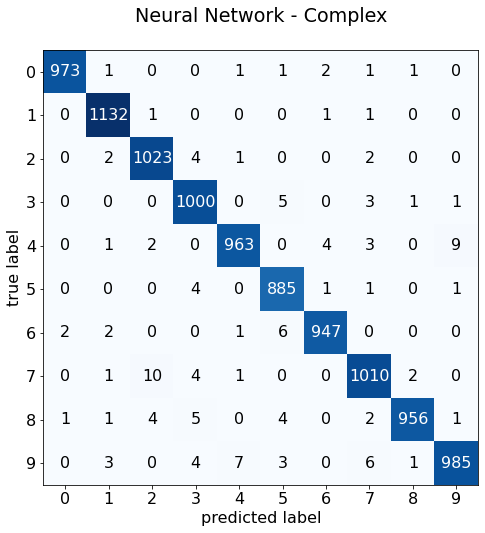

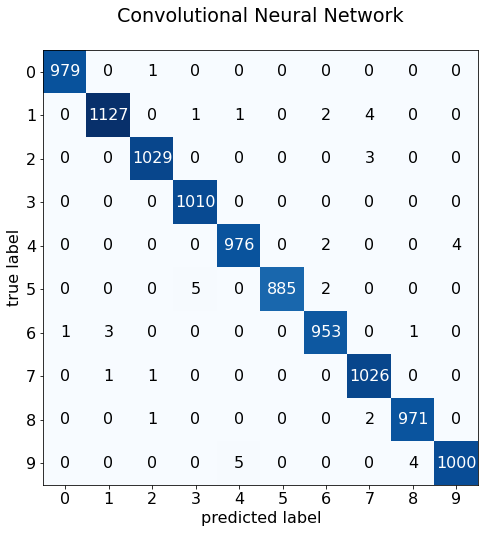

In [23]:
plt.rcParams.update({'font.size': 16})

def plot_confusion_mtx(model, x_test, plot_tittle):
    pred_prob = model.predict(x_test)
    pred = np.argmax(pred_prob, axis = 1)

    CM = confusion_matrix(np.argmax(y_test, axis = 1), pred)

    plot_confusion_matrix(conf_mat = CM, figsize = (16, 8))
    plt.title(plot_tittle)
    plt.xticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.show()

plot_confusion_mtx(model_NNS, x_test, 'Neural Network - Simple - Normalized')
plot_confusion_mtx(model_NNS_N, x_test * 255, 'Neural Network - Simple - Not Normalized')
plot_confusion_mtx(model_NNC, x_test, 'Neural Network - Complex')
plot_confusion_mtx(model_CNN, x_test, 'Convolutional Neural Network')

- **Questão 1:** <br>
Tomando por base o conjunto de dados MNIST, padrão do pacote Keras, defina e elabore uma rede neural sequencial, apresentando os formatos dos tensores de entrada e saída, bem como os tensores intermediários na rede. Treine e teste o modelo de rede neural sequencial desenvolvido, de forma que ele consiga atingir uma precisão de pelo menos 97% no teste, no reconhecimento das imagens de números escritos à mão livre. Compare o desempenho da rede neural no treino utilizando dados normalizados e não normalizados. após 50 épocas de treino. Aumente o número de camadas internas da rede neural e determine se isto melhora ou não a qualidade dos resultados no teste. <span style="color:red"><strong>Qual o número de camadas que você consideraria ideal?</strong></span> </br>

Finalmente vamos analisar a performance do modelo visualizando algumas imagens com erro de classificação e algumas imagens com acerto de classificação do melhor modelo que é o convolucional.

In [24]:
y_true = np.argmax(y_test, axis = 1)
pred_prob = model_CNN.predict(x_test)
y_pred = np.argmax(pred_prob, axis = 1)
errors = (y_pred - y_true != 0)
hits = (y_pred - y_true == 0)

y_test_erros  = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

y_test_hits  = y_pred[hits]
y_true_hits = y_true[hits]
x_test_hits = x_test[hits]

print('Convolutional Neural Network')
print('quantidade de erros: \t' + str(len(y_test_erros)))
print('quantidade de hits: \t' + str(len(y_test_hits)))

Convolutional Neural Network
quantidade de erros: 	44
quantidade de hits: 	9956


Abaixo alguns erros de classificação do melhor modelo desenvolvido.

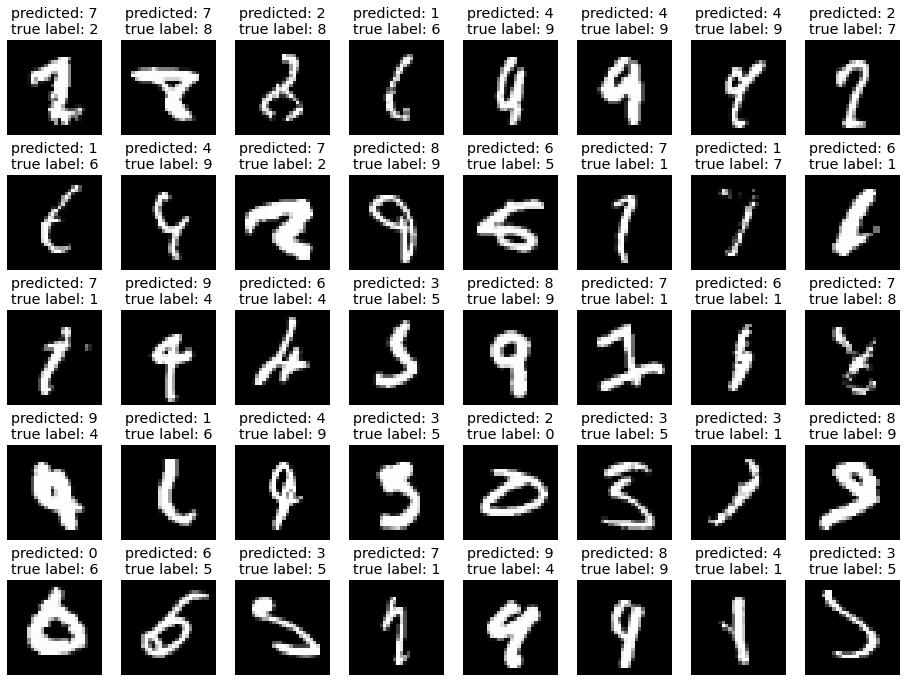

In [25]:
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows = 5

for i in range(1, columns * rows + 1):
    img = np.reshape(x_test_errors[i], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title('predicted: ' + str(y_test_erros[i]) + 
              '\ntrue label: ' + str(y_true_errors[i]))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

Abaixo alguns acertos de classificação do melhor modelo desenvolvido.

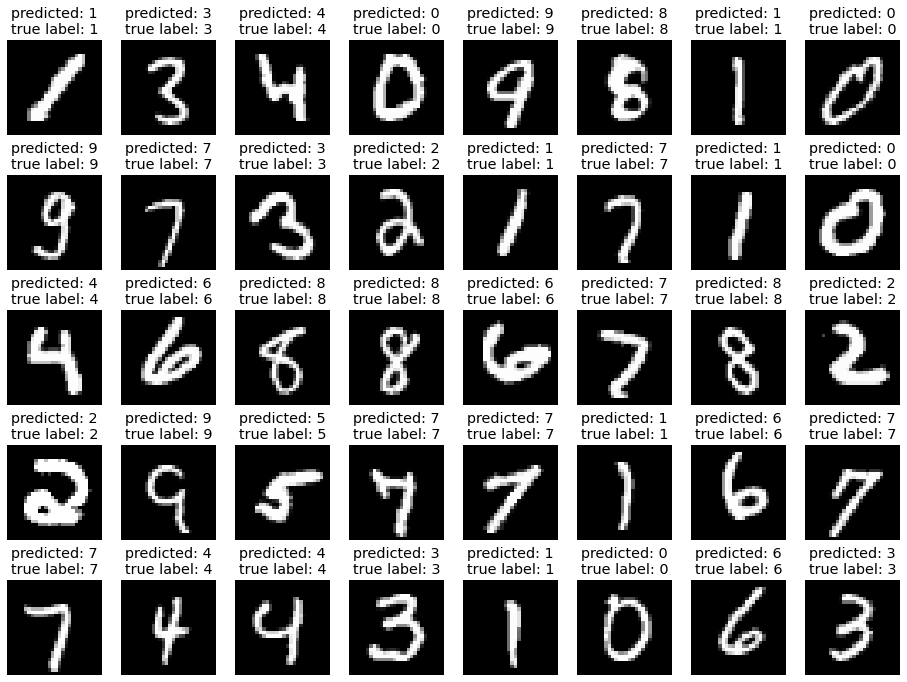

In [26]:
plt.rcParams.update({'font.size': 12})

fig = plt.figure(figsize = (16, 12))
columns = 8
rows = 5

for i in range(1, columns * rows + 1):
    rnd = np.random.randint(0, len(x_test_hits))
    img = np.reshape(x_test_hits[rnd], (28, 28))
    fig.add_subplot(rows, columns, i)
    plt.title('predicted: ' + str(y_test_hits[rnd]) + 
              '\ntrue label: ' + str(y_true_hits[rnd]))
    plt.axis('off')
    plt.imshow(img, cmap = 'gray')

plt.show()

# Questão 2

- **Questão 2:** <br>
<span style="color:red"><strong>Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests.</strong></span> Tentem trabalhar a hiperparametrização para aumento do desempenho. Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</br>

Iniciamos por importar o classificador `RandomForestClassifier` da library Scikit Learn.

In [27]:
from sklearn.ensemble import RandomForestClassifier

Vamos carregar novamente dos datasets de treino e teste do mnist para garantir que estamos trabalhando sem nenhuma transformação indesejada inserida pelos passos anteriores.

In [28]:
x_train, y_train = tfds.as_numpy(
    tfds.load('mnist', 
              batch_size = -1,
              split = 'train',
              as_supervised = True))

x_test, y_test = tfds.as_numpy(
    tfds.load('mnist', 
              batch_size = -1,
              split = 'test',
              as_supervised = True))

Para o treinamento da **Random Forest** faremos o reshape dos tensores para que cada pixel represente uma variável do modelo.

In [29]:
x_train = x_train.reshape([x_train.shape[0], -1]).astype('float32')
x_test  = x_test.reshape([x_test.shape[0], -1]).astype('float32')

x_train.shape

(60000, 784)

Iniciamos o treinamento do modelo de **Random Forest** com alguns hiperparâmetros iniciais:

|Parâmetro|Função|Valor|
|---|---|---|
|`n_estimators`|Número de arvores|`100`|
|`criterion`|Critério de avaliação da qualidade da separação de um nó|`gini`|
|`max_depth`|Profundidade máxima da arvore|`256`|
|`min_samples_split`|O número mínimo de observações para a divisão de um nó|`15`|
|`min_samples_leaf`|Número mínimo de observações de um nó|`10`|


In [30]:
%%time
RF = RandomForestClassifier(n_estimators = 100,
                            criterion = 'gini',
                            max_depth = 256,
                            min_samples_split = 15,
                            min_samples_leaf = 10,
                            n_jobs = -1,             # Paralelizado entre todos os CPUs
                            random_state = seed)     # Nosso número mágico de escolha

RF.fit(x_train, y_train)

CPU times: user 51.8 s, sys: 123 ms, total: 51.9 s
Wall time: 28.4 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=256, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1729, verbose=0,
                       warm_start=False)

Com o modelo treinado faremos a predição dos dígitos e verificamos a acurácia do modelo de **Random Forest**

In [31]:
pred = RF.predict(x_test)

print('------------------------------------------------------------')
print('Classification Report -Random Forest')
print(classification_report(y_test, pred))
print("Accuracy: %.4f" % accuracy_score(y_test, pred))
print('------------------------------------------------------------\n')

------------------------------------------------------------
Classification Report -Random Forest
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.96      0.95      1032
           3       0.95      0.95      0.95      1010
           4       0.96      0.96      0.96       982
           5       0.96      0.94      0.95       892
           6       0.96      0.97      0.97       958
           7       0.96      0.95      0.96      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.94      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

Accuracy: 0.9582
------------------------------------------------------------



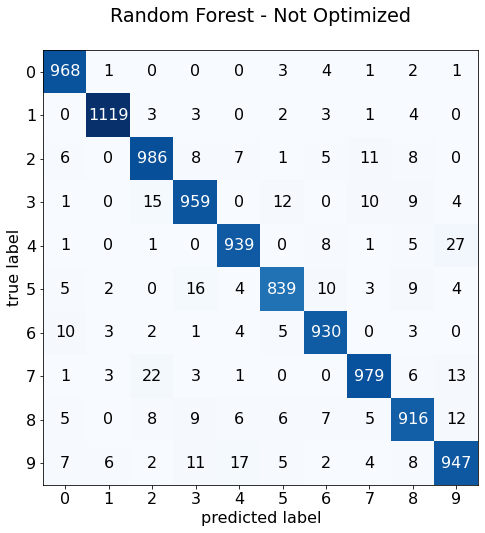

In [32]:
plt.rcParams.update({'font.size': 16})

def plot_confusion_mtx(model, x_test, plot_tittle):
    pred= model.predict(x_test)

    CM = confusion_matrix(y_test, pred)

    plot_confusion_matrix(conf_mat = CM, figsize = (16, 8))
    plt.title(plot_tittle)
    plt.xticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    plt.yticks(range(10), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

    plt.show()

plot_confusion_mtx(RF, x_test, 'Random Forest - Not Optimized')

In [33]:
y_pred = RF.predict(x_test)
errors = (y_pred - y_test != 0)
hits = (y_pred - y_test == 0)

y_test_erros  = y_pred[errors]
y_true_errors = y_test[errors]
x_test_errors = x_test[errors]

y_test_hits  = y_pred[hits]
y_true_hits = y_test[hits]
x_test_hits = x_test[hits]

print('Random Forest - Not Optimized')
print('quantidade de erros: \t' + str(len(y_test_erros)))
print('quantidade de hits: \t' + str(len(y_test_hits)))

Random Forest - Not Optimized
quantidade de erros: 	418
quantidade de hits: 	9582


- **Questão 2:** <br>
Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests. <span style="color:red"><strong>Tentem trabalhar a hiperparametrização para aumento do desempenho.</strong></span> Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</br>

Para isso vamos utilizar a library `hyperopt` para otimzar os hiperparâmetros do modelo de forma automática.

In [34]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

Iniciamos por definir um espaço de busca de hiperparâmetros.

In [35]:
hyper_space = {'n_estimators': hp.quniform('n_estimators', 25, 500, 5),
               'criterion': hp.choice('criterion', ["gini", "entropy"]),
               'max_depth': hp.quniform('max_depth', 1, 100, 1),
               'min_samples_split': hp.quniform('min_samples_split', 5, 50, 1),
               'min_samples_leaf': hp.quniform('min_samples_leaf', 2, 20, 1)}

Definimos nosso modelo em uma função que utiliza os valores presentes em nosso espaço de busca.

In [36]:
def hyper_RF(hyper_space):
    
    global best_score
    
    RF = RandomForestClassifier(n_estimators = int(hyper_space['n_estimators']),
                                criterion = hyper_space['criterion'],
                                max_depth = int(hyper_space['max_depth']),
                                min_samples_split = int(hyper_space['min_samples_split']),
                                min_samples_leaf = int(hyper_space['min_samples_leaf']),
                                n_jobs = -1,
                                random_state = seed)

    RF.fit(x_train, y_train)

    pred = RF.predict(x_test)
    acc = 1 - accuracy_score(y_test, pred)
    
    if (acc < best_score):
        best_score = acc
    
    return {'loss': acc, 'status': STATUS_OK }

Iniciamos o objeto `Trials` que irá armazenar o resultdado de cada iteração (total de 50 iterações `neval = 50`) do processo de otimização realizado pela função `fmin`.

In [37]:
%%time
trials = Trials()
neval = 50
best_score = 0

best_hyper = fmin(fn = hyper_RF,
                  space = hyper_space,
                  algo = tpe.suggest,
                  max_evals = neval,
                  trials = trials,
                  rstate = np.random.RandomState(seed))

best_hyper

100%|██████████| 50/50 [1:47:13<00:00, 128.66s/trial, best loss: 0.031000000000000028]
CPU times: user 3h 21min 17s, sys: 25.5 s, total: 3h 21min 42s
Wall time: 1h 47min 13s


{'criterion': 1,
 'max_depth': 46.0,
 'min_samples_leaf': 2.0,
 'min_samples_split': 8.0,
 'n_estimators': 495.0}

Finalmente realizamos o treinamento de uma **Random Forest** com os hiperparâmetros ótimos encontrados em nosso espaço de busca. 

In [38]:
OPT_RF = RandomForestClassifier(n_estimators = int(best_hyper['n_estimators']),
                                criterion = ["gini", "entropy"][best_hyper['criterion']],
                                max_depth = int(best_hyper['max_depth']),
                                min_samples_split = int(best_hyper['min_samples_split']),
                                min_samples_leaf = int(best_hyper['min_samples_leaf']),
                                n_jobs = -1, 
                                random_state = seed)

OPT_RF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=46, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=495,
                       n_jobs=-1, oob_score=False, random_state=1729, verbose=0,
                       warm_start=False)

Para finalizar vamos avaliar a performance do modelo com hiperparâmetros otimizados.

In [39]:
pred = OPT_RF.predict(x_test)

print('------------------------------------------------------------')
print('Classification Report - Random Forest - Optimized')
print(classification_report(y_test, pred))
print("Accuracy: %.4f" % accuracy_score(y_test, pred))
print('------------------------------------------------------------\n')

------------------------------------------------------------
Classification Report - Random Forest - Optimized
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.96      0.96      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy: 0.9690
------------------------------------------------------------



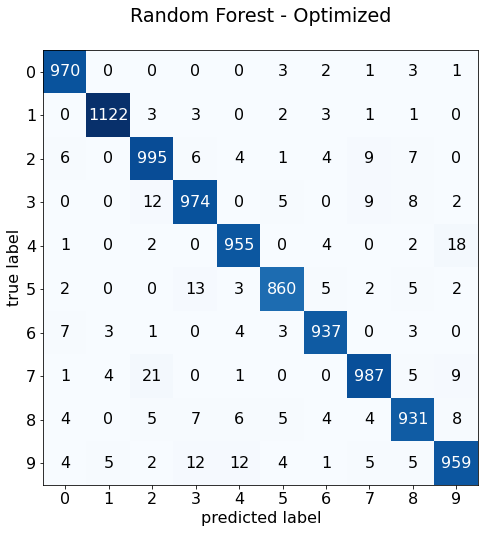

In [40]:
plot_confusion_mtx(OPT_RF, x_test, 'Random Forest - Optimized')

In [41]:
y_pred = OPT_RF.predict(x_test)
errors = (y_pred - y_test != 0)
hits = (y_pred - y_test == 0)

y_test_erros  = y_pred[errors]
y_true_errors = y_test[errors]
x_test_errors = x_test[errors]

y_test_hits  = y_pred[hits]
y_true_hits = y_test[hits]
x_test_hits = x_test[hits]

print('Random Forest - Optimized')
print('quantidade de erros: \t' + str(len(y_test_erros)))
print('quantidade de hits: \t' + str(len(y_test_hits)))

Random Forest - Optimized
quantidade de erros: 	310
quantidade de hits: 	9690


- **Questão 2:** <br>
Resolva o mesmo problema da Questão 1 utilizando o algoritmo Random Forests.Tentem trabalhar a hiperparametrização para aumento do desempenho.  <span style="color:red"><strong>Compare o seu melhor resultado com o resultado obtido na Questão 1 e comente.</strong></span></br>

Conforme os resultados obtidos neste exercício o melhor modelo é a rede neural convolucional com aproximadamente **`99.5%`** de acurácia contra cerca de **`97%`** da nossa **Random Forest** otimizada.

Adicionalmente para encontrar a nossa melhor parametrização de **Random Forest** foi necessário **`1 Hr e 57 Min`** contra **`14 Min`** para a **Rede Neural Convolucional**

# Referências

- [Advanced-Predictive-Analysis-CNN-Implementation](https://www.kaggle.com/rodrigonca/advanced-predictive-analysis-cnn-implementation) por [Daniel Campos](https://www.kaggle.com/danielferrazcampos), [Leandro Daniel](https://www.kaggle.com/leandrodaniel), [Rodrigo Goncalves](https://www.kaggle.com/rodrigonca) e [Ygor Lima](https://www.kaggle.com/ygorlima1)

- [Hyperopt Documentation](http://hyperopt.github.io/hyperopt/)

- [Hyperparameter Optimization in Python - Part 2: Hyperopt](https://towardsdatascience.com/hyperparameter-optimization-in-python-part-2-hyperopt-5f661db91324) por [Jakub Czakon](https://towardsdatascience.com/@jakub.czakon)

- [Scikit-Learn - Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

- [Scikit Learn - RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

- [Uma introdução as redes neurais convolucionais utilizando o Keras](https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e), por [Alan Melo Clappis](https://medium.com/@clappis)

- [Tensorflow Datasets](https://www.tensorflow.org/datasets/overview)

- [Tensorflow 2.0 API Documentation](https://www.tensorflow.org/api_docs)